# Final Project - PySpark

El enlace al repositorio es el siguiente: [GitHub](https://github.com/MiguelGG03/Final_Poject_PySpark.git)

Importamos la librería para hacer unas pruebas 

In [74]:
from pyspark import SparkContext
import dask.dataframe as dd

Una cosa a tener en cuenta dentro de la librería `dask.dataframe` es que cuando quieres recibir el resultado de una función o método , como puede ser la media, tienes que utilizar las mismas sentencias que en pandas, pero agregandole un `.compute()` al final.

In [75]:
df= dd.read_csv("air_traffic_data.csv", sep=",")
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


Tamaño del dataframe

In [76]:
df.size.compute()

240112

Nombre de las columnas

In [77]:
df.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count', 'Adjusted Activity Type Code',
       'Adjusted Passenger Count', 'Year', 'Month'],
      dtype='object')

In [78]:
df.isna().sum().compute()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [79]:
df[df["Operating Airline IATA Code"].isna()==True].compute()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
148,200508,Boeing Company,NaN,Boeing Company,NaN,Domestic,US,Deplaned,Other,Other,Other,18,Deplaned,18,2005,August
6814,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,73,Deplaned,73,2010,May
6815,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,73,Enplaned,73,2010,May
6925,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Deplaned,Other,International,A,160,Deplaned,160,2010,June
6926,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Enplaned,Other,International,A,160,Enplaned,160,2010,June
7173,201008,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,118,Deplaned,118,2010,August
7174,201008,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,118,Enplaned,118,2010,August
7747,201101,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,40,Deplaned,40,2011,January
7748,201101,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,A,40,Enplaned,40,2011,January
7972,201103,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,64,Deplaned,64,2011,March


Voy a informarme de lo que es el IATA code para saber si es relevante o elimino los datos

> Literalmente según el señor Google IATA es la forma abreviada de una asociación fundada para inspeccionar y asignar las tarifas de transporte de carga y pasajeros.

> También podemos ver que en el resto de casos si que tienen un IATA diferente dependiendo de la Aerolinea con la que viajan, por lo que si conseguimos asegurar que toda la gente que viaja con las aerolineas cuyo IATA es NaN, entonces podemos suponer como `unknown` esos datos.

In [80]:
df[df['Operating Airline']=='Servisair'].compute()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
6814,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,73,Deplaned,73,2010,May
6815,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,73,Enplaned,73,2010,May
7173,201008,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,118,Deplaned,118,2010,August
7174,201008,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,118,Enplaned,118,2010,August
7747,201101,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,40,Deplaned,40,2011,January
7748,201101,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,A,40,Enplaned,40,2011,January
7972,201103,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,64,Deplaned,64,2011,March
7973,201103,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,A,64,Enplaned,64,2011,March
8327,201106,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,237,Deplaned,237,2011,June
8328,201106,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,A,262,Enplaned,262,2011,June


Mi teoría se confirma, vamos a cambiar esos `NaN` por unos `unknown`

In [81]:
df[df["Operating Airline IATA Code"].isnull()] = df[df["Operating Airline IATA Code"].isnull()].fillna("unknown")

In [82]:
df.isna().sum().compute()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
Adjusted Activity Type Code    0
Adjusted Passenger Count       0
Year                           0
Month                          0
dtype: int64

In [83]:
df[df["Operating Airline IATA Code"]=='unknown'].compute()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
148,200508,Boeing Company,unknown,Boeing Company,unknown,Domestic,US,Deplaned,Other,Other,Other,18,Deplaned,18,2005,August
6814,201005,Servisair,unknown,Servisair,unknown,Domestic,US,Deplaned,Low Fare,International,G,73,Deplaned,73,2010,May
6815,201005,Servisair,unknown,Servisair,unknown,Domestic,US,Enplaned,Low Fare,International,G,73,Enplaned,73,2010,May
6925,201006,Pacific Aviation,unknown,Pacific Aviation,unknown,International,Europe,Deplaned,Other,International,A,160,Deplaned,160,2010,June
6926,201006,Pacific Aviation,unknown,Pacific Aviation,unknown,International,Europe,Enplaned,Other,International,A,160,Enplaned,160,2010,June
7173,201008,Servisair,unknown,Servisair,unknown,Domestic,US,Deplaned,Low Fare,International,G,118,Deplaned,118,2010,August
7174,201008,Servisair,unknown,Servisair,unknown,Domestic,US,Enplaned,Low Fare,International,G,118,Enplaned,118,2010,August
7747,201101,Servisair,unknown,Servisair,unknown,Domestic,US,Deplaned,Low Fare,International,A,40,Deplaned,40,2011,January
7748,201101,Servisair,unknown,Servisair,unknown,Domestic,US,Enplaned,Low Fare,International,A,40,Enplaned,40,2011,January
7972,201103,Servisair,unknown,Servisair,unknown,Domestic,US,Deplaned,Low Fare,International,A,64,Deplaned,64,2011,March


Voy a intentar hacer una diagrama de correlación para saber un poco la relacion que tienen unos datoss con otros

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

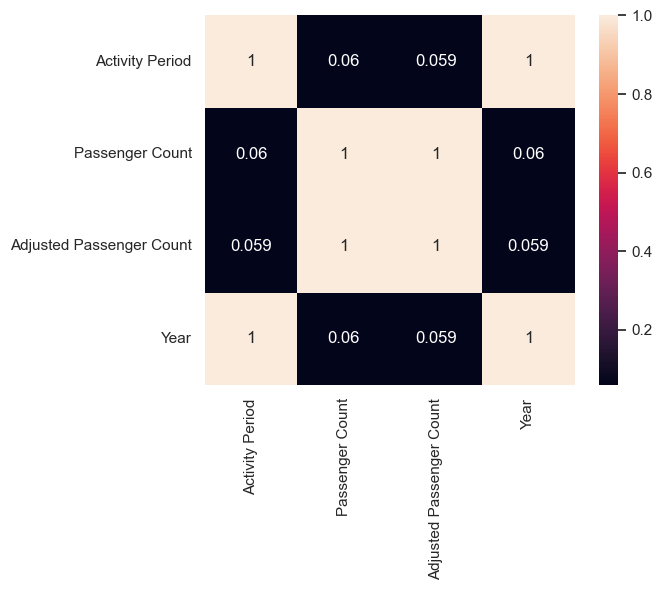

In [91]:
corr = df.corr().compute()
sns.heatmap(corr, annot = True, square=True)
plt.show()